### hierarchical on mall customers

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram,linkage
import scipy.cluster.hierarchy as sch

In [2]:
df=pd.read_csv('segmented_customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [3]:
df.shape

(200, 5)

In [4]:
df. isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
x=df.iloc[:,3:5]
x.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


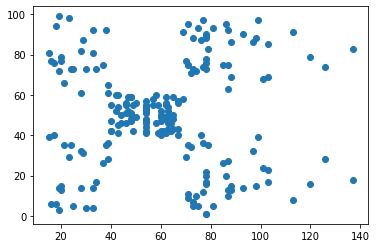

In [6]:
plt.scatter(x["Annual Income (k$)"],x["Spending Score (1-100)"])

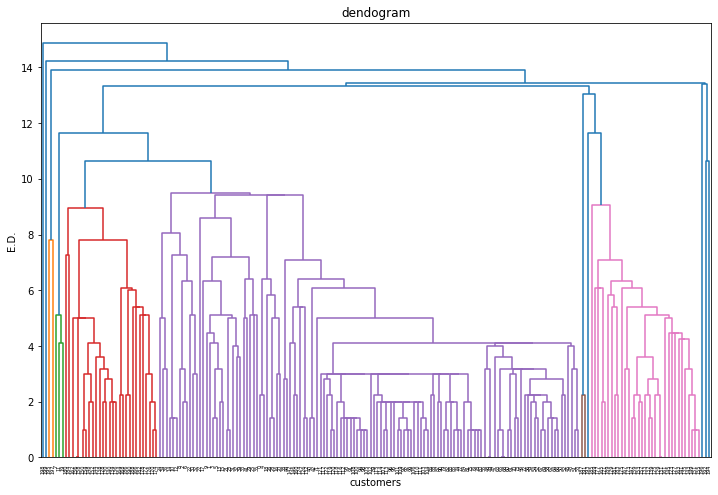

In [7]:
plt.figure(figsize=(12,8))
dendrogram=sch.dendrogram(sch.linkage(x,method="single"))
plt.title("dendogram")
plt.xlabel("customers")
plt.ylabel("E.D.")
plt.show()

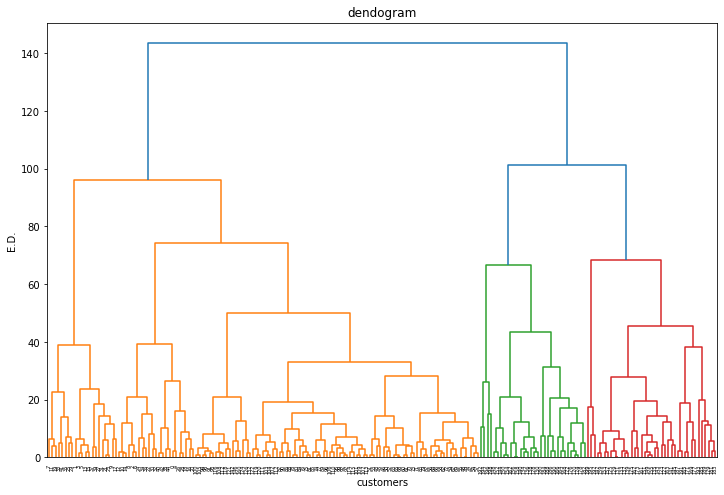

In [8]:
plt.figure(figsize=(12,8))
dendrogram=sch.dendrogram(sch.linkage(x,method="complete"))
plt.title("dendogram")
plt.xlabel("customers")
plt.ylabel("E.D.")
plt.show()

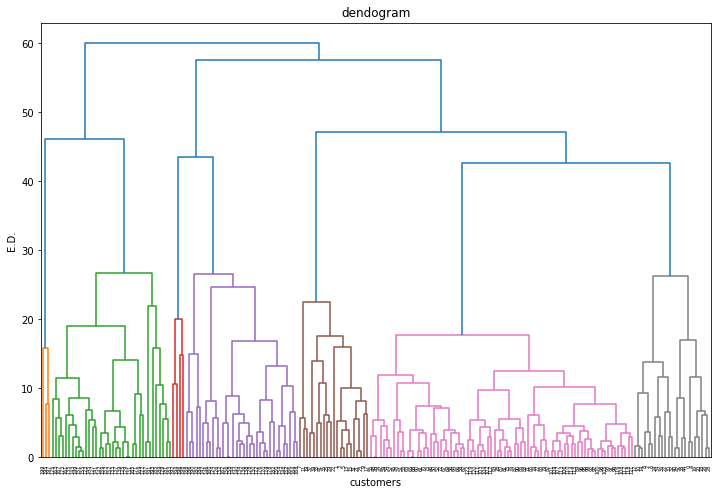

In [9]:
plt.figure(figsize=(12,8))
dendrogram=sch.dendrogram(sch.linkage(x,method="average"))
plt.title("dendogram")
plt.xlabel("customers")
plt.ylabel("E.D.")
plt.show()

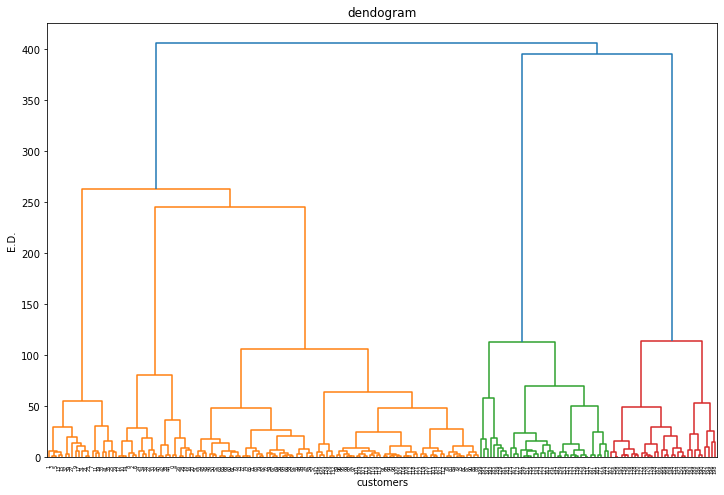

In [10]:
plt.figure(figsize=(12,8))
dendrogram=sch.dendrogram(sch.linkage(x,method="ward"))
plt.title("dendogram")
plt.xlabel("customers")
plt.ylabel("E.D.")
plt.show()

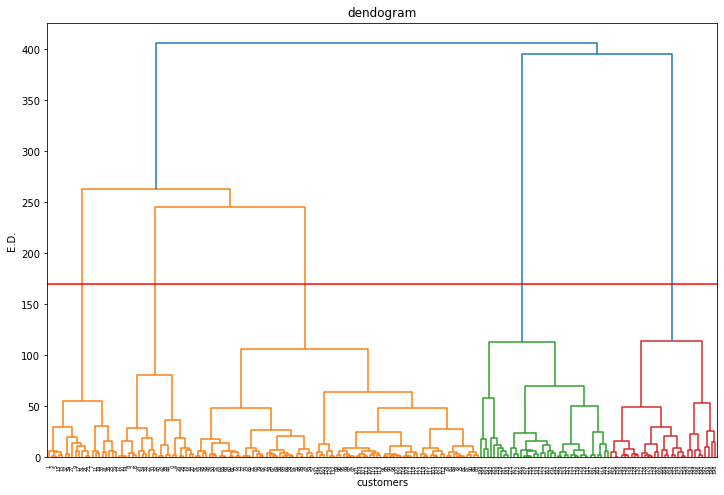

In [11]:
plt.figure(figsize=(12,8))
dendrogram=sch.dendrogram(sch.linkage(x,method="ward"))
plt.axhline(y = 170 , color = "red" )
plt.title("dendogram")
plt.xlabel("customers")
plt.ylabel("E.D.")
plt.show()

In [12]:
cluster = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
y_hc=cluster.fit_predict(x)
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

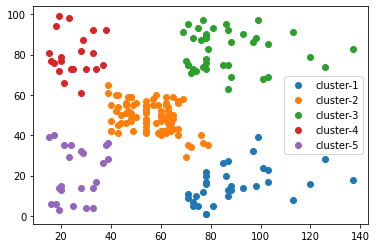

In [13]:
plt.scatter(x.values[y_hc==0,0],x.values[y_hc==0,1],label='cluster-1')
plt.scatter(x.values[y_hc==1,0],x.values[y_hc==1,1],label='cluster-2')
plt.scatter(x.values[y_hc==2,0],x.values[y_hc==2,1],label='cluster-3')
plt.scatter(x.values[y_hc==3,0],x.values[y_hc==3,1],label='cluster-4')
plt.scatter(x.values[y_hc==4,0],x.values[y_hc==4,1],label='cluster-5')
plt.legend()
plt.show()

In [14]:
df['target']=y_hc
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),target
0,1,1,19,15,39,4
1,2,1,21,15,81,3
2,3,0,20,16,6,4
3,4,0,23,16,77,3
4,5,0,31,17,40,4
...,...,...,...,...,...,...
195,196,0,35,120,79,2
196,197,0,45,126,28,0
197,198,1,32,126,74,2
198,199,1,32,137,18,0
